In [1]:
from pyspark.sql import SparkSession 
from pyspark.sql import functions as fn, Row
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

spark = SparkSession.builder.appName('project').getOrCreate()
sc = spark.sparkContext

In [2]:
df_pandas = pd.read_csv('application_train.csv')

In [3]:
df_pandas.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(df_pandas)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


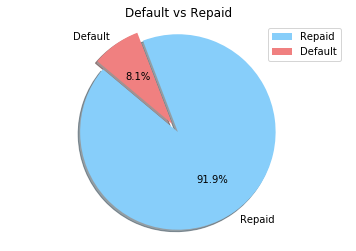

In [6]:
#Piechart of defaulted and repayed loans

a =  df_pandas['TARGET'].value_counts()
b = pd.Series(['Repaid', 'Default'])
c = {'Count': a, 'Legend':b}
d = pd.DataFrame(data = c)
d

labels = d['Legend']
sizes = a.values
colors = ('lightskyblue','lightcoral')
explode = (0.1,0)
plt.pie(sizes, labels= labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow = True, startangle = 140)
plt.legend(labels, loc ='best')
plt.title('Default vs Repaid')
plt.axis('equal')
plt.show()

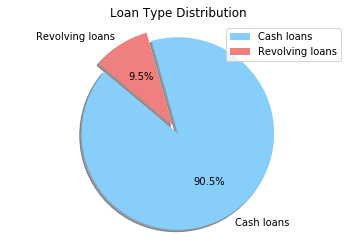

In [7]:
#Types of Loans
df_loan_type = df_pandas.groupby('NAME_CONTRACT_TYPE').count()

labels = df_loan_type.index
sizes = df_loan_type['TARGET']
colors = ('lightskyblue','lightcoral')
explode = (0.1,0)
plt.pie(sizes, labels= labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow = True, startangle = 140)
plt.legend(labels, loc ='best')
plt.title('Loan Type Distribution')
plt.axis('equal')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


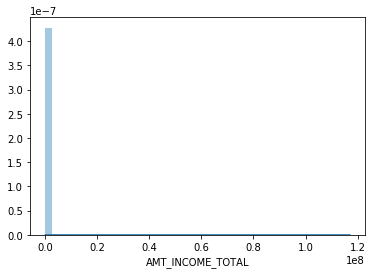

In [8]:
#not sure why this is not properly generating
x = df_pandas['AMT_INCOME_TOTAL'].astype('int')
sns.distplot(x);

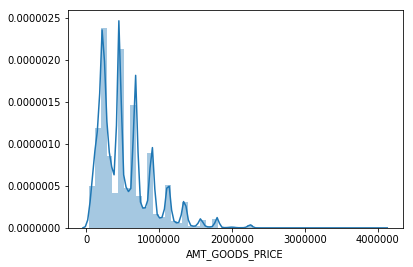

In [9]:
x = df_pandas['AMT_GOODS_PRICE']
sns.distplot(x.dropna())

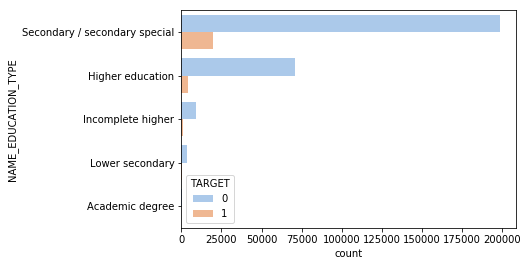

In [10]:
sns.countplot(y = 'NAME_EDUCATION_TYPE', palette = 'pastel', hue= 'TARGET',  data = df_pandas) 

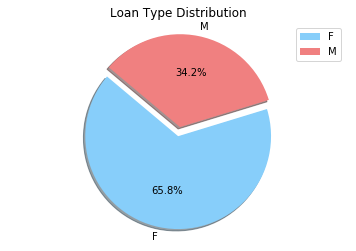

In [11]:
#Gender Distribution
y =  df_pandas['CODE_GENDER'].value_counts()
df = pd.DataFrame({'labels': y.index, 'values': y.values})
df = df[:2]
labels = df['labels']
sizes = df['values']
colors = ('lightskyblue','lightcoral')
explode = (0.1,0)
plt.pie(sizes, labels= labels, explode = explode, colors = colors, autopct='%1.1f%%', shadow = True, startangle = 140)
plt.legend(labels, loc ='best')
plt.title('Loan Type Distribution')
plt.axis('equal')
plt.show()


Text(0.5,1,'Top 10 - positive Correlation with Target Variable')

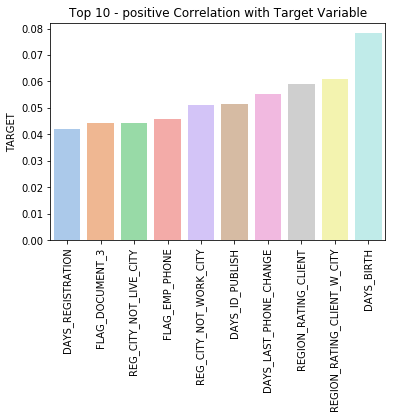

In [12]:
# get correlations
correlations = df_pandas.corr()['TARGET'].sort_values()
top_corr = correlations.tail(11)
top_corr = top_corr[:10]
g = sns.barplot(x = top_corr.index, y = top_corr , palette = 'pastel')
g.set_xticklabels(top_corr.index, rotation=90)
g.set_title("Top 10 - positive Correlation with Target Variable")

Text(0.5,1,'Top 10 - negative Correlation with Target Variable')

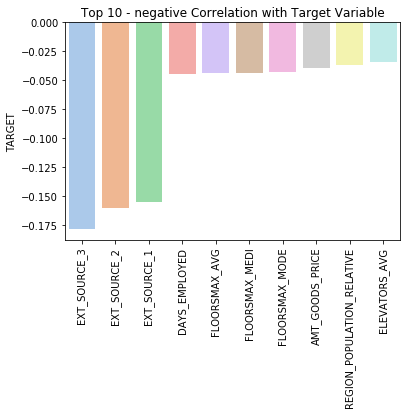

In [13]:
neg_corr = correlations.head(11)
neg_corr = neg_corr[:10]
g = sns.barplot(x = neg_corr.index, y = neg_corr , palette = 'pastel')
g.set_xticklabels(neg_corr.index, rotation=90)
g.set_title("Top 10 - negative Correlation with Target Variable")


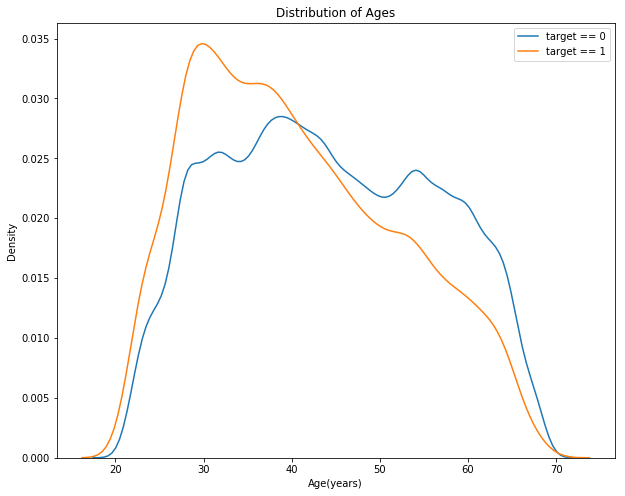

In [14]:
plt.figure(figsize = (10, 8))

#KDE plot of loans that were repaid on time
sns.kdeplot(df_pandas.loc[df_pandas['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

#KDE plot of loans that were not repaid on time
sns.kdeplot(df_pandas.loc[df_pandas['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

#labeling
plt.xlabel('Age(years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

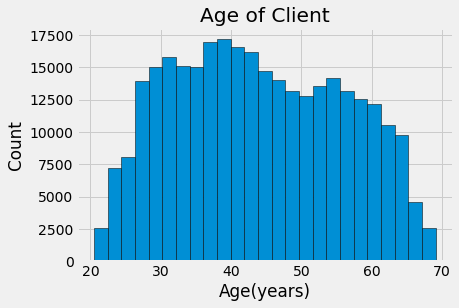

In [15]:
#style of plots
plt.style.use('fivethirtyeight')

#distribution of ages in years
plt.hist(df_pandas['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client');
plt.xlabel('Age(years)');
plt.ylabel('Count');

Text(0.5,0,'Days of Employment')

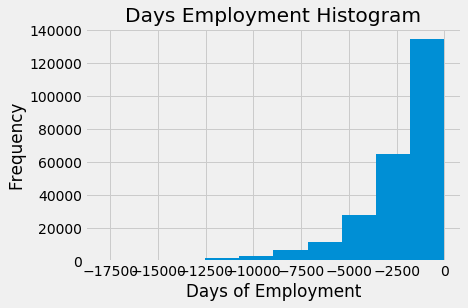

In [16]:
#create an anomalous flag column
df_pandas['DAYS_EMPLOYED_ANOM'] = df_pandas['DAYS_EMPLOYED'] == 365243

#replace the anomalous values with nan
df_pandas['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_pandas['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days of Employment')

In [17]:
#lets see the anomalous clients and see if they tend to have high or low rates of default than the rest of the clients
anom = df_pandas[df_pandas['DAYS_EMPLOYED'] == 365243]
non_anom = df_pandas[df_pandas['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


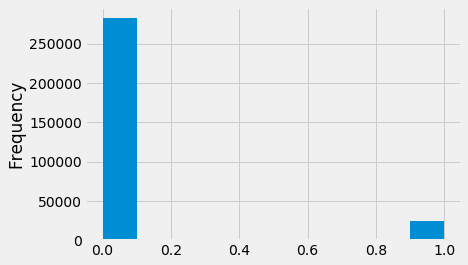

In [18]:
df_pandas['TARGET'].astype(int).plot.hist();
#there is an imbalance, there is a lot more people who repaid on time, rather than having difficulties
#we can weight the classes by their representation in the data to reflect this imbalance

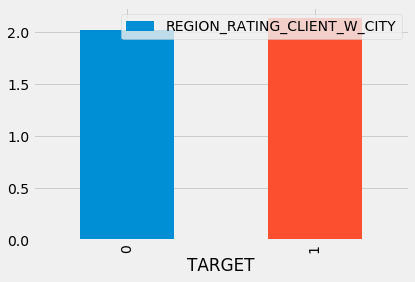

In [ ]:
df_pandas[['TARGET', 'REGION_RATING_CLIENT_W_CITY']].groupby('TARGET').mean().reset_index().plot(x='TARGET', y='REGION_RATING_CLIENT_W_CITY', kind='bar')


(array([ 34167.,      0.,      0.,      0.,      0., 229484.,      0.,
             0.,      0.,  43860.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

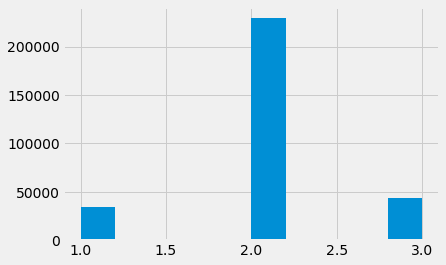

In [ ]:
plt.hist(df_pandas['REGION_RATING_CLIENT_W_CITY'])

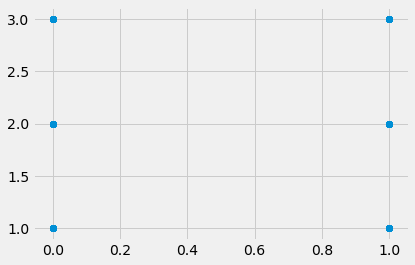

In [ ]:
plt.scatter(x=df_pandas['TARGET'], y=df_pandas['REGION_RATING_CLIENT_W_CITY'])

(array([11964., 27687., 32635., 33546., 34335., 40350., 41758., 38430.,
        33120., 13686.]),
 array([-25229., -23455., -21681., -19907., -18133., -16359., -14585.,
        -12811., -11037.,  -9263.,  -7489.]),
 <a list of 10 Patch objects>)

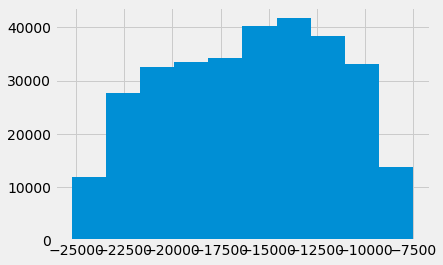

In [ ]:
plt.hist(df_pandas['DAYS_BIRTH'])

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


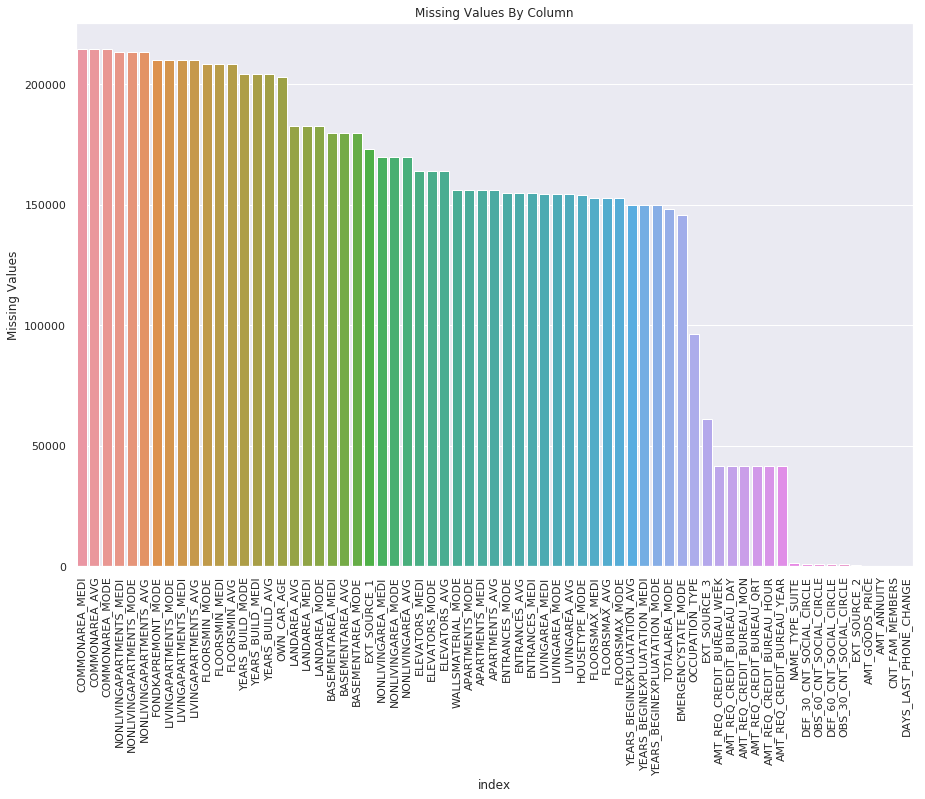

In [7]:
missDF = missing_values_table(df_pandas)
missDF2 = missDF.reset_index()
plot_df2=missDF2.drop('% of Total Values', axis=1)
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.barplot(x="index", y="Missing Values", data=plot_df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Missing Values By Column')
plt.show()

In [ ]:
sns.catplot(x = 'CODE_GENDER', y = 'AMT_CREDIT', kind = 'violin', split = True, hue= 'NAME_CONTRACT_TYPE', data = df_pandas)

In [ ]:
sns.catplot(x = 'NAME_CONTRACT_TYPE', y = 'AMT_CREDIT', kind = 'violin', split = True, hue= 'TARGET', data = df_pandas)